### Jupyter Notebook "3-Kmeans_&_KNN":  
* 7-Imports.
     * 7.1-Import librerias necesarias.
     * 7.2-Import de DFs del Jupyter Notebook anterior.
     
* 8-Preparando Datos para K-means y KNN.

* 9-K-means.

* 10-KNN y export del modelo.

* 11-Clasificando nuevas muestras.

### 7-Imports.

### 7.1-Import librerias necesarias.

In [231]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import string
import math

#K-means:
from sklearn.cluster import KMeans
import numpy as np
from pandas import DataFrame

#KNN:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### 7.2-Import de DFs del Jupyter Notebook anterior.

In [232]:
df_compar_cand_jobs_loaded = pd.read_pickle('DF_Exportado_Jobs_And_Candidates_own_model')
df_compar_cand_jobs_loaded.shape

(3131, 8)

In [233]:
df_compar_cand_jobs_loaded.head(10)

,Candidate_Name,clean_Content_CV,tokens_Content_CV,Job_Title,clean_Job_Description,tokens_Job_Description,tfidf_cosine,WMD
0,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Data Scientist,master_degree stem field including_limited com...,"[master_degree, stem, field, including_limited...",0.042817,0.517
1,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Data Scientist 2,reporting director data analytics senior data_...,"[reporting, director, data, analytics, senior,...",0.111344,0.525
2,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",HCM Consultant,oracle cloud hcm absence consultant responsibl...,"[oracle, cloud, hcm, absence, consultant, resp...",0.018021,0.501
3,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",HCM Consultant 2,peoplesoft oracle_eb implementation support hc...,"[peoplesoft, oracle_eb, implementation, suppor...",0.013100,0.500
4,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Machine Learning Engineer,leveraging_latest machine deep_learning techni...,"[leveraging_latest, machine, deep_learning, te...",0.050443,0.518
5,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Machine Learning Engineer 2,collaborate multidisciplinary_team gain_insigh...,"[collaborate, multidisciplinary_team, gain_ins...",0.064975,0.515
6,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Security Specialist,fast_paced environment combine technical secur...,"[fast_paced, environment, combine, technical, ...",0.006386,0.502
7,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Security Specialist 2,handling incoming_request assistance business ...,"[handling, incoming_request, assistance, busin...",0.010147,0.492
8,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Web Developer Full Stack,graduate_degree information technology similar...,"[graduate_degree, information, technology, sim...",0.018713,0.493
9,DataScientist_Karla_Lewis,data_scientist brooklyn ny data_scientist grub...,"[data_scientist, brooklyn, ny, data_scientist,...",Web Developer Full Stack 2,enter existing codebases extend functionality ...,"[enter, existing, codebases, extend, functiona...",0.016421,0.501


## 8-Preparando Datos para K-means y KNN.

Por último eliminaremos 1 CV y 1 Job Description (un total de 501 filas) de df_compar_cand_jobs, estos los utilizaremos en '11-' para predecir con KNN con estos Candidatos y Descripciones de Puestos que no vieron los modelos K-means ni KNN. 

De esta manera nos quedará el df_compar_cand_jobs con 60000 filas / puntos para entrenar K-means y KNN.
Y X filas para  **COMPLETAR**

## ESTO DE ABAJO VER SI HACERLO EN UN NUEVO DF... 4, PARA SABER QUE DEBERÍA CALCULAR AL AGREGARSE UN NUEVO CANDIDATO Y UN NUEVO JOB DESC.

Vamos a eliminar del DF: 
* 1 posición (HCM Consultant 2).
* 1 candidato (Data_Scientist_Karla_Lewis). 

Para luego predecir con estos ejemplos, y viendo qué funciones se deberían llamar.

In [234]:
#Nos quedamos con las columnas necesarias:
DF_J_and_C = df_compar_cand_jobs_loaded.loc[:, ['Candidate_Name', 'Job_Title', 'tfidf_cosine', 'WMD']]
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD
0,DataScientist_Karla_Lewis,Data Scientist,0.042817,0.517
1,DataScientist_Karla_Lewis,Data Scientist 2,0.111344,0.525
2,DataScientist_Karla_Lewis,HCM Consultant,0.018021,0.501
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.013100,0.500
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.050443,0.518
...,...,...,...,...
3126,Neha Mugghala,Test Lead / Test Manager,0.025742,0.485
3127,Neha Mugghala,Principal Application Analyst-Supply Chain Lawson,0.105683,0.516
3128,Neha Mugghala,Messaging Administrator,0.063452,0.512
3129,Neha Mugghala,"Java Architect - Denver, CO - Fulltime",0.080821,0.507


## Armamos un DF aparte con la posición HCM Consultant 2 y sus valores para cada Candidato.
## Y eliminamos sus filas de 'DF_J_and_C'.


In [235]:
#Filtramos el puesto HCM Consultant 2:
is_HCM_Consultant_2 =  DF_J_and_C['Job_Title']=='HCM Consultant 2'
DF_HCM_C_2 = DF_J_and_C[is_HCM_Consultant_2]
DF_HCM_C_2

,Candidate_Name,Job_Title,tfidf_cosine,WMD
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.013100,0.500
34,DataScientist_Rahul_Malik,HCM Consultant 2,0.003291,0.491
65,HCM_Federico_Calonge,HCM Consultant 2,0.272370,0.544
96,HCM_Robert_Smith,HCM Consultant 2,0.055150,0.528
127,MLEngineer_Bradly_Johnston,HCM Consultant 2,0.039275,0.513
...,...,...,...,...
2979,Naveen Arora,HCM Consultant 2,0.101804,0.524
3010,Naveen Kumar Bandela,HCM Consultant 2,0.059242,0.507
3041,Naveen.S_Resume,HCM Consultant 2,0.054330,0.506
3072,Navneeth Resume,HCM Consultant 2,0.239717,0.573


In [236]:
new_df_withouth_HCM_CONS_2 =  DF_J_and_C[(DF_J_and_C['Job_Title']!='HCM Consultant 2')]
new_df_withouth_HCM_CONS_2

,Candidate_Name,Job_Title,tfidf_cosine,WMD
0,DataScientist_Karla_Lewis,Data Scientist,0.042817,0.517
1,DataScientist_Karla_Lewis,Data Scientist 2,0.111344,0.525
2,DataScientist_Karla_Lewis,HCM Consultant,0.018021,0.501
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.050443,0.518
5,DataScientist_Karla_Lewis,Machine Learning Engineer 2,0.064975,0.515
...,...,...,...,...
3126,Neha Mugghala,Test Lead / Test Manager,0.025742,0.485
3127,Neha Mugghala,Principal Application Analyst-Supply Chain Lawson,0.105683,0.516
3128,Neha Mugghala,Messaging Administrator,0.063452,0.512
3129,Neha Mugghala,"Java Architect - Denver, CO - Fulltime",0.080821,0.507


#### Armamos un DF aparte con la Candidata Data_Scientist_Karla_Lewis y sus valores para cada Posición.
#### Y eliminamos sus filas de 'DF_J_and_C'.. 

In [237]:
#Filtramos el Candidata ' Data_Scientist_Karla_Lewis':
is_Karla_Lewis =  DF_J_and_C['Candidate_Name']=='DataScientist_Karla_Lewis'
DF_Karla_Lewis = DF_J_and_C[is_Karla_Lewis]
DF_Karla_Lewis

,Candidate_Name,Job_Title,tfidf_cosine,WMD
0,DataScientist_Karla_Lewis,Data Scientist,0.042817,0.517
1,DataScientist_Karla_Lewis,Data Scientist 2,0.111344,0.525
2,DataScientist_Karla_Lewis,HCM Consultant,0.018021,0.501
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.013100,0.500
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.050443,0.518
5,DataScientist_Karla_Lewis,Machine Learning Engineer 2,0.064975,0.515
6,DataScientist_Karla_Lewis,Security Specialist,0.006386,0.502
7,DataScientist_Karla_Lewis,Security Specialist 2,0.010147,0.492
8,DataScientist_Karla_Lewis,Web Developer Full Stack,0.018713,0.493
9,DataScientist_Karla_Lewis,Web Developer Full Stack 2,0.016421,0.501


In [238]:
new_df_withouth_HCM_CONS_2_and_Karla =  new_df_withouth_HCM_CONS_2[(new_df_withouth_HCM_CONS_2['Candidate_Name']!='DataScientist_Karla_Lewis')]
DF_J_and_C = new_df_withouth_HCM_CONS_2_and_Karla
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD
31,DataScientist_Rahul_Malik,Data Scientist,0.024535,0.507
32,DataScientist_Rahul_Malik,Data Scientist 2,0.097801,0.519
33,DataScientist_Rahul_Malik,HCM Consultant,0.016022,0.491
35,DataScientist_Rahul_Malik,Machine Learning Engineer,0.044236,0.513
36,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.067935,0.514
...,...,...,...,...
3126,Neha Mugghala,Test Lead / Test Manager,0.025742,0.485
3127,Neha Mugghala,Principal Application Analyst-Supply Chain Lawson,0.105683,0.516
3128,Neha Mugghala,Messaging Administrator,0.063452,0.512
3129,Neha Mugghala,"Java Architect - Denver, CO - Fulltime",0.080821,0.507


In [239]:
#Reseteamos los índices:
DF_J_and_C = DF_J_and_C.reset_index(drop=True)
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD
0,DataScientist_Rahul_Malik,Data Scientist,0.024535,0.507
1,DataScientist_Rahul_Malik,Data Scientist 2,0.097801,0.519
2,DataScientist_Rahul_Malik,HCM Consultant,0.016022,0.491
3,DataScientist_Rahul_Malik,Machine Learning Engineer,0.044236,0.513
4,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.067935,0.514
...,...,...,...,...
2995,Neha Mugghala,Test Lead / Test Manager,0.025742,0.485
2996,Neha Mugghala,Principal Application Analyst-Supply Chain Lawson,0.105683,0.516
2997,Neha Mugghala,Messaging Administrator,0.063452,0.512
2998,Neha Mugghala,"Java Architect - Denver, CO - Fulltime",0.080821,0.507


### 9-K-means

#### 1ro un ejemplo de kmeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [240]:
#Ver imports:
    #np
    #KMeans
    
#Suponemos X nuestro DF con 2 features para entrenar KNN:
#Por ejemplo 1,1,1,10,10,10 es uno de nuestros features.
             #y 2,4,0,2,4,0 es el otro de nuestros features.
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

#Ahora entrenamos kmeans con 2 clusters (k = 2):
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#Y luego de entrenarlo obtenemos nuestros labels (nuestros resultados: a qué k pertenece cada vector
#que definimos arriba en "X")

print(kmeans.labels_)

#Ahora vamos a predecir con nuevos 2 nuevos valores/vectores:
kmeans.predict([[0, 0], [12, 3]])

#Vemos la posición en X e Y de nuestros 2 centroides:
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[[10.  2.]
 [ 1.  2.]]


#### Ahora si, a nuestro ejemplo concreto:

In [241]:
#X y Y son nuestros FEATURES:
X = np.array(DF_J_and_C["tfidf_cosine"])
Y = np.array(DF_J_and_C['WMD'])

Data = {'x': X,
        'y': Y
       }
  
df = DataFrame(Data,columns=['x','y'])
df

,x,y
0,0.024535,0.507
1,0.097801,0.519
2,0.016022,0.491
3,0.044236,0.513
4,0.067935,0.514
...,...,...
2995,0.025742,0.485
2996,0.105683,0.516
2997,0.063452,0.512
2998,0.080821,0.507


In [242]:
#Entrenamos Kmeans con todo nuestro DF:
#(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]¶

kmeans = KMeans(n_clusters=4,random_state=1).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.0646944  0.52040842]
 [0.11043208 0.53819975]
 [0.0301744  0.49688782]
 [0.21722852 0.56401724]]
[2 1 2 ... 0 0 0]


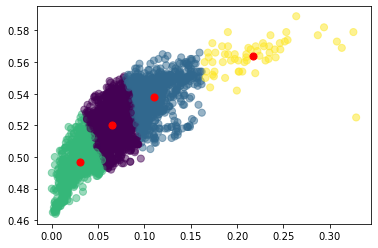

In [243]:
#Ploteamos los centroides de cada grupo:

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label = 'centroids')
plt.show()

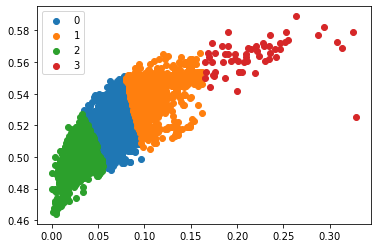

In [244]:
#Ploteamos cada grupo:

fig, ax = plt.subplots()
scatter_x = np.array(DF_J_and_C["tfidf_cosine"])
scatter_y = np.array(DF_J_and_C['WMD'])
group = np.array(kmeans.labels_)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

In [245]:
#Añadimos la columna al DF:
new_column =  kmeans.labels_
DF_J_and_C['Result K-means'] = new_column
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD,Result K-means
0,DataScientist_Rahul_Malik,Data Scientist,0.024535,0.507,2
1,DataScientist_Rahul_Malik,Data Scientist 2,0.097801,0.519,1
2,DataScientist_Rahul_Malik,HCM Consultant,0.016022,0.491,2
3,DataScientist_Rahul_Malik,Machine Learning Engineer,0.044236,0.513,2
4,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.067935,0.514,0
...,...,...,...,...,...
2995,Neha Mugghala,Test Lead / Test Manager,0.025742,0.485,2
2996,Neha Mugghala,Principal Application Analyst-Supply Chain Lawson,0.105683,0.516,1
2997,Neha Mugghala,Messaging Administrator,0.063452,0.512,0
2998,Neha Mugghala,"Java Architect - Denver, CO - Fulltime",0.080821,0.507,0


In [246]:
type(DF_J_and_C['Result K-means'])

pandas.core.series.Series

#### Creamos nueva columna 'Result K-means final' indicando los nuevos valores de los labels, para ser más claros y ordenar de menor a mayor similitud las comparaciones:
    * Nivel Bajo Similitud:     ('Result K-means' = 2)  -->  ('Result K-means final' = 0)
    * Nivel Medio Similitud:    ('Result K-means' = 0)  -->  ('Result K-means final' = 1)
    * Nivel Alto Similitud:     ('Result K-means' = 1)  -->  ('Result K-means final' = 2)
    * Nivel Muy Alto SImilitud: ('Result K-means' = 3)  -->  ('Result K-means final' = 3)

In [250]:
dic = {2: 0, 0: 1, 1: 2, 3: 3}
DF_J_and_C['Result K-means'].replace(dic, inplace=True)

In [251]:
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD,Result K-means
0,DataScientist_Rahul_Malik,Data Scientist,0.024535,0.507,0
1,DataScientist_Rahul_Malik,Data Scientist 2,0.097801,0.519,2
2,DataScientist_Rahul_Malik,HCM Consultant,0.016022,0.491,0
3,DataScientist_Rahul_Malik,Machine Learning Engineer,0.044236,0.513,0
4,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.067935,0.514,1
...,...,...,...,...,...
2995,Neha Mugghala,Test Lead / Test Manager,0.025742,0.485,0
2996,Neha Mugghala,Principal Application Analyst-Supply Chain Lawson,0.105683,0.516,2
2997,Neha Mugghala,Messaging Administrator,0.063452,0.512,1
2998,Neha Mugghala,"Java Architect - Denver, CO - Fulltime",0.080821,0.507,1


In [253]:
new_df =  DF_J_and_C[(DF_J_and_C['Result K-means']==2) | (DF_J_and_C['Result K-means']==3)]
new_df.head(20)

,Candidate_Name,Job_Title,tfidf_cosine,WMD,Result K-means
1,DataScientist_Rahul_Malik,Data Scientist 2,0.097801,0.519,2
32,HCM_Federico_Calonge,HCM Consultant,0.328562,0.525,3
90,MLEngineer_Bradly_Johnston,Data Scientist,0.159509,0.566,2
91,MLEngineer_Bradly_Johnston,Data Scientist 2,0.313058,0.569,3
93,MLEngineer_Bradly_Johnston,Machine Learning Engineer,0.246166,0.572,3
94,MLEngineer_Bradly_Johnston,Machine Learning Engineer 2,0.325581,0.579,3
99,MLEngineer_Bradly_Johnston,AUTOMATION TEST ENGINEER,0.091566,0.556,2
101,MLEngineer_Bradly_Johnston,Business Solutions Architect,0.085650,0.543,2
120,MLEngineer_Jonathon_Price,Data Scientist,0.193347,0.561,3
121,MLEngineer_Jonathon_Price,Data Scientist 2,0.307761,0.573,3


In [254]:
is_Bradly_Johnston =  DF_J_and_C['Candidate_Name']=='WebDev_Alec_Dionisio'
new_DF = DF_J_and_C[is_Bradly_Johnston]
print(new_DF.shape)
new_DF

(30, 5)


,Candidate_Name,Job_Title,tfidf_cosine,WMD,Result K-means
210,WebDev_Alec_Dionisio,Data Scientist,0.026220,0.507,0
211,WebDev_Alec_Dionisio,Data Scientist 2,0.054018,0.519,1
212,WebDev_Alec_Dionisio,HCM Consultant,0.027991,0.500,0
213,WebDev_Alec_Dionisio,Machine Learning Engineer,0.037168,0.527,1
214,WebDev_Alec_Dionisio,Machine Learning Engineer 2,0.052904,0.523,1
215,WebDev_Alec_Dionisio,Security Specialist,0.045052,0.526,1
216,WebDev_Alec_Dionisio,Security Specialist 2,0.022972,0.498,0
217,WebDev_Alec_Dionisio,Web Developer Full Stack,0.060872,0.522,1
218,WebDev_Alec_Dionisio,Web Developer Full Stack 2,0.068923,0.529,1
219,WebDev_Alec_Dionisio,AUTOMATION TEST ENGINEER,0.059000,0.533,1


## 10-KNN y export del modelo.

In [255]:
#En X colocamos únicamente las features numéricas 'tfidf_cosine' y 'WMD' para predecir la variable Y.
x_data = DF_J_and_C.drop(["Candidate_Name","Job_Title","Result K-means"],axis=1)

#En Y colocaremos nuestra variable a predecir / nuestro "target", 'Result K-means':
y = DF_J_and_C['Result K-means']

In [256]:
x_data

,tfidf_cosine,WMD
0,0.024535,0.507
1,0.097801,0.519
2,0.016022,0.491
3,0.044236,0.513
4,0.067935,0.514
...,...,...
2995,0.025742,0.485
2996,0.105683,0.516
2997,0.063452,0.512
2998,0.080821,0.507


In [257]:
y

0       0
1       2
2       0
3       0
4       1
       ..
2995    0
2996    2
2997    1
2998    1
2999    1
Name: Result K-means, Length: 3000, dtype: int64

In [258]:
#Ver imports: 
    #train_test_split
    #KNeighborsClassifier
    #metrics

#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [265]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,50) #Valores de K (1-50)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0, 0.5, 'Testing Accuracy')

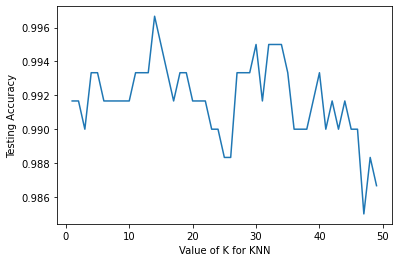

In [266]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [267]:
#Elegimos un K=14 ya que vemos que allí la eficiencia es del 0,996% (Alta) y nuestro algoritmo predecirá bien.

### 2.1-Entrenamos al algoritmo de KNN con un K óptimo (K=14)

In [268]:
k_Optimo=14
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 0.9966666666666667


In [269]:
#Exportamos el modelo KNN para usarlo en 3-New_Candidate_&_New_Job_Description usando pickle.
pickle.dump(knn, open('Modelo_KNN_0_996.sav', 'wb')) #Guardamos el modelo localmente.

## 11-Clasificando nuevas muestras.

Prediciendo con KNN, agregando nuevos Candidatos y nuevas Descripciones de Puestos.

Ahora vamos a analizar qué funciones llamar al agregarse un nuevo Candidato y un nuevo Job Description.
Luego de entrenar nuestro modelo vamos a PREDECIR con estas posición "HCM Consultant 2" para todos los Candidatos y con la Candidata "Data_Scientist_Karla_Lewis" (simulamos agregar una posición y una candidata). 

In [270]:
knn_model_loaded = pickle.load(open('Modelo_KNN_0_996.sav', 'rb')) #Cargamos el modelo que guardamos previamente con pickle.

##### 3.1-¿Qué pasa al añadir un nuevo Candidato (Data_Scientist_Karla_Lewis)? ¿Qué se tiene que volver a calcular?
##### DF_Karla_Lewis

In [271]:
#Al agregar un nuevo candidato (aplica al puesto) se calcula el WMD y Cosine y se PREDICE con este modelo de KNN. 
#En esta predicción te clasifica de acuerdo a las 5 categorías que creamos con k-means.

#DF_Karla_Lewis

x_predict_karla = DF_Karla_Lewis.drop(["Candidate_Name","Job_Title"],axis=1)
x_predict_karla

,tfidf_cosine,WMD
0,0.042817,0.517
1,0.111344,0.525
2,0.018021,0.501
3,0.013100,0.500
4,0.050443,0.518
5,0.064975,0.515
6,0.006386,0.502
7,0.010147,0.492
8,0.018713,0.493
9,0.016421,0.501


In [272]:
y_pred=knn.predict(x_predict_karla)
y_pred

array([1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0])

In [273]:
len(y_pred)

31

In [274]:
#Añadimos la columna al DF:
new_column =  y_pred
DF_Karla_Lewis['Result KNN'] = new_column
DF_Karla_Lewis

<ipython-input-274-4a07ab06c151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Karla_Lewis['Result KNN'] = new_column


,Candidate_Name,Job_Title,tfidf_cosine,WMD,Result KNN
0,DataScientist_Karla_Lewis,Data Scientist,0.042817,0.517,1
1,DataScientist_Karla_Lewis,Data Scientist 2,0.111344,0.525,2
2,DataScientist_Karla_Lewis,HCM Consultant,0.018021,0.501,0
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.013100,0.500,0
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.050443,0.518,1
5,DataScientist_Karla_Lewis,Machine Learning Engineer 2,0.064975,0.515,1
6,DataScientist_Karla_Lewis,Security Specialist,0.006386,0.502,0
7,DataScientist_Karla_Lewis,Security Specialist 2,0.010147,0.492,0
8,DataScientist_Karla_Lewis,Web Developer Full Stack,0.018713,0.493,0
9,DataScientist_Karla_Lewis,Web Developer Full Stack 2,0.016421,0.501,0


##### 3.2¿Qué pasa al añadir un nuevo Job Description (HCM Consultant 2)? ¿Qué se tiene que volver a calcular?

##### DF_HCM_C_2

In [275]:
#No pasa nada hasta que un Candidato aplica al puesto... y ahi pasa lo exṕlicado anteriormente en el punto 3 (justo arriba VER)
x_predict_HCM_C_2 = DF_HCM_C_2.drop(["Candidate_Name","Job_Title"],axis=1)
x_predict_HCM_C_2

,tfidf_cosine,WMD
3,0.013100,0.500
34,0.003291,0.491
65,0.272370,0.544
96,0.055150,0.528
127,0.039275,0.513
...,...,...
2979,0.101804,0.524
3010,0.059242,0.507
3041,0.054330,0.506
3072,0.239717,0.573


In [276]:
#x_predict_HCM_C_2

y_pred=knn.predict(x_predict_HCM_C_2)
y_pred

array([0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 1,
       1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 3, 1])

In [277]:
len(y_pred)

101

In [278]:
#Añadimos la columna al DF:
new_column =  y_pred
DF_HCM_C_2['Result KNN'] = new_column
DF_HCM_C_2

<ipython-input-278-eb53d5f9647a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_HCM_C_2['Result KNN'] = new_column


,Candidate_Name,Job_Title,tfidf_cosine,WMD,Result KNN
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.013100,0.500,0
34,DataScientist_Rahul_Malik,HCM Consultant 2,0.003291,0.491,0
65,HCM_Federico_Calonge,HCM Consultant 2,0.272370,0.544,3
96,HCM_Robert_Smith,HCM Consultant 2,0.055150,0.528,1
127,MLEngineer_Bradly_Johnston,HCM Consultant 2,0.039275,0.513,0
...,...,...,...,...,...
2979,Naveen Arora,HCM Consultant 2,0.101804,0.524,2
3010,Naveen Kumar Bandela,HCM Consultant 2,0.059242,0.507,1
3041,Naveen.S_Resume,HCM Consultant 2,0.054330,0.506,1
3072,Navneeth Resume,HCM Consultant 2,0.239717,0.573,3


In [109]:
#Conclusión: me dieron resultados esperables las predicciones.